In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
np.random.seed(20)

## Simple histogram

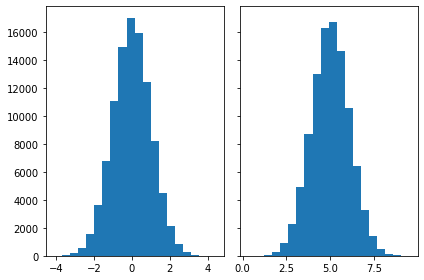

In [2]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
plt.show()

## Updating histogram colors

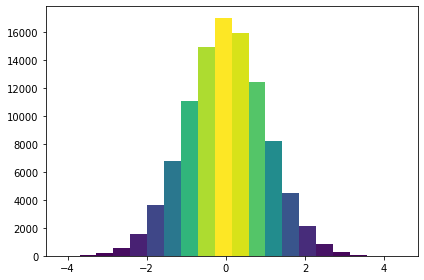

In [3]:
fig, axs = plt.subplots(1, 1, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    

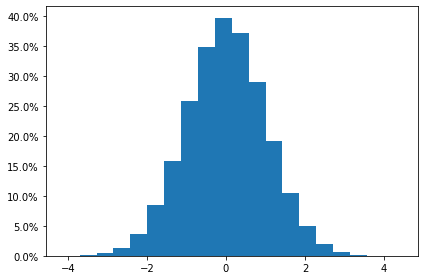

In [4]:
fig, axs = plt.subplots(1, 1, tight_layout=True)
# We can also normalize our inputs by the total number of counts
axs.hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))


## Using datafrom to plot histogram

In [5]:
from sklearn import datasets
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

NameError: name 'pd' is not defined

### Choosing bin size is very important
refer to this link :- 
https://www.statisticshowto.com/choose-bin-sizes-statistics/

In [ ]:
N=len(df_boston)
from math import log
k=1 + 3.322*log(N)
print("Number of bin:-",k)

In [ ]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(df_boston['RM'], bins=int(k))
axs[1].hist(df_boston['RM'], bins=10)
plt.show()